In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('churn_dataset.csv.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.15,random_state = 68)

In [20]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1293,3022-BEXHZ,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.20,7530.8,0
4689,2832-SCUCO,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.90,57.4,0
5621,6424-ELEYH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.75,229.5,1
4399,3086-RUCRN,Female,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),103.10,6595,0
6913,8213-TAZPM,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),108.75,7493.05,0


In [18]:
train['Churn'] = train['Churn'].apply(lambda x:1 if x=='Yes' else 0)
test['Churn'] = test['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [22]:
def checking_yes_or_no(df):
    result = []
    for c in df.columns.tolist():
        num = df[c].nunique()
        if num==2:
            temp = df[c].unique().tolist()
            if temp== ['Yes','No'] or temp==['No','Yes']:
                result.append(c)
    return result

In [39]:
temp = checking_yes_or_no(train)

In [41]:
for c in temp:
    train[c] = train[c].apply(lambda x:1 if x=='Yes' else 0)
    test[c] = test[c].apply(lambda x:1 if x=='Yes' else 0)

In [83]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1293,1,0,1,1,67,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),111.20,7530.8,0
4689,0,0,0,0,2,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Electronic check,19.90,57.4,0
5621,0,0,1,0,3,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Credit card (automatic),74.75,229.5,1
4399,0,0,0,0,66,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Month-to-month,1,Bank transfer (automatic),103.10,6595,0
6913,0,0,1,1,69,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),108.75,7493.05,0


In [49]:
train.drop('customerID',axis=1,inplace=True)

In [53]:
train['gender'] = train.gender.apply(lambda x:1 if x=='Male' else 0)
test['gender'] = test.gender.apply(lambda x:1 if x=='Male' else 0)

In [85]:
def checking_yes_or_no_no_internet_service(df):
    valid_values = {'No', 'No internet service', 'Yes'}
    return [col for col in df.columns if set(df[col].dropna().unique()) - valid_values == set()]

In [87]:
temp = checking_yes_or_no_no_internet_service(train)

In [89]:
temp

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [93]:
train_encoded = pd.get_dummies(train, columns=temp, drop_first=True)
test_encoded = pd.get_dummies(test, columns=temp, drop_first=True)

In [103]:
train_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
1293,1,0,1,1,67,1,Yes,Fiber optic,Two year,1,Bank transfer (automatic),111.20,7530.8,0,False,False,False,True,False,True,False,True,False,True,False,True
4689,0,0,0,0,2,1,No,No,Month-to-month,0,Electronic check,19.90,57.4,0,True,False,True,False,True,False,True,False,True,False,True,False
5621,0,0,1,0,3,1,Yes,Fiber optic,Month-to-month,1,Credit card (automatic),74.75,229.5,1,False,False,False,False,False,False,False,False,False,False,False,False
4399,0,0,0,0,66,1,Yes,Fiber optic,Month-to-month,1,Bank transfer (automatic),103.10,6595,0,False,True,False,True,False,True,False,True,False,False,False,True
6913,0,0,1,1,69,1,Yes,Fiber optic,One year,1,Bank transfer (automatic),108.75,7493.05,0,False,False,False,True,False,True,False,True,False,True,False,True


In [75]:
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns', None)

In [129]:
temp = train_encoded.select_dtypes(include=['boolean']).columns.tolist()
for c in temp:
    train_encoded[c] = train_encoded[c].astype(int)
    test_encoded[c] = test_encoded[c].astype(int)

In [131]:
train_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
1293,1,0,1,1,67,1,Fiber optic,Two year,1,Bank transfer (automatic),111.20,7530.8,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
4689,0,0,0,0,2,1,No,Month-to-month,0,Electronic check,19.90,57.4,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
5621,0,0,1,0,3,1,Fiber optic,Month-to-month,1,Credit card (automatic),74.75,229.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4399,0,0,0,0,66,1,Fiber optic,Month-to-month,1,Bank transfer (automatic),103.10,6595,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1
6913,0,0,1,1,69,1,Fiber optic,One year,1,Bank transfer (automatic),108.75,7493.05,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


In [216]:
test_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
581,3627-FHKBK,0,0,0,0,1,1,0,75.30,75.30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
193,9680-NIAUV,0,0,1,1,72,1,0,109.70,8129.30,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2266,5732-IKGQH,1,1,1,0,52,1,1,104.45,5481.25,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0
5893,3549-ZTMNH,1,0,1,1,12,1,1,24.00,269.65,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
4443,2672-OJQZP,0,0,0,0,1,1,0,44.75,44.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [121]:
train_encoded.MultipleLines.value_counts()

MultipleLines
No                  2870
Yes                 2531
No phone service     585
Name: count, dtype: int64

In [123]:
train_encoded = pd.get_dummies(train_encoded,columns=['MultipleLines'],drop_first=True)

In [127]:
test_encoded = pd.get_dummies(test_encoded,columns=['MultipleLines'],drop_first=True)

In [145]:
test_encoded.PaymentMethod.value_counts()

PaymentMethod
Electronic check             344
Mailed check                 254
Bank transfer (automatic)    233
Credit card (automatic)      226
Name: count, dtype: int64

In [147]:
for c in train_encoded.select_dtypes(exclude=['number'])
    print(c)

InternetService
Contract
PaymentMethod
TotalCharges


In [174]:
result = []
for a in train_encoded.TotalCharges.unique().tolist():
    try:
        float(a)
    except ValueError:
        result.append(a)

In [186]:
#train_encoded['TotalCharges'] = train_encoded['TotalCharges'].apply(lambda x: -1 if x==' ' else float(x))
test_encoded['TotalCharges'] = test_encoded['TotalCharges'].apply(lambda x: -1 if x==' ' else float(x))

In [188]:
len(train_encoded[train_encoded.TotalCharges==-1])

10

In [202]:
train_encoded = train_encoded.loc[train_encoded['TotalCharges'] != -1]

In [204]:
test_encoded = test_encoded.loc[test_encoded['TotalCharges'] != -1]

In [208]:
temp = train_encoded.select_dtypes(exclude=['number']).columns.tolist()
train_encoded = pd.get_dummies(train_encoded,columns=temp,drop_first=True)
test_encoded = pd.get_dummies(test_encoded,columns=temp,drop_first=True)

In [214]:
for c in train_encoded.select_dtypes(include=['boolean']):
    train_encoded[c] = train_encoded[c].astype(int)
    test_encoded[c] = test_encoded[c].astype(int)

In [218]:
train_encoded.to_csv('first_train.csv',index=False)
test_encoded.to_csv('first_test.csv',index=False)

In [3]:
train = pd.read_csv('first_train.csv')
test = pd.read_csv('first_test.csv')

In [5]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,67,1,1,111.20,7530.80,0,...,1,0,1,1,0,0,1,0,0,0
1,0,0,0,0,2,1,0,19.90,57.40,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,3,1,1,74.75,229.50,1,...,0,0,1,1,0,0,0,1,0,0
3,0,0,0,0,66,1,1,103.10,6595.00,0,...,1,0,1,1,0,0,0,0,0,0
4,0,0,1,1,69,1,1,108.75,7493.05,0,...,1,0,1,1,0,1,0,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5976 non-null   int64  
 1   SeniorCitizen                          5976 non-null   int64  
 2   Partner                                5976 non-null   int64  
 3   Dependents                             5976 non-null   int64  
 4   tenure                                 5976 non-null   int64  
 5   PhoneService                           5976 non-null   int64  
 6   PaperlessBilling                       5976 non-null   int64  
 7   MonthlyCharges                         5976 non-null   float64
 8   TotalCharges                           5976 non-null   float64
 9   Churn                                  5976 non-null   int64  
 10  OnlineSecurity_No internet service     5976 non-null   int64  
 11  Onli

In [15]:
train.corr()['Churn'].sort_values()

tenure                                  -0.357361
Contract_Two year                       -0.304058
StreamingTV_No internet service         -0.226933
DeviceProtection_No internet service    -0.226933
OnlineBackup_No internet service        -0.226933
InternetService_No                      -0.226933
TechSupport_No internet service         -0.226933
StreamingMovies_No internet service     -0.226933
OnlineSecurity_No internet service      -0.226933
TotalCharges                            -0.202582
Contract_One year                       -0.178517
OnlineSecurity_Yes                      -0.170797
TechSupport_Yes                         -0.170120
Dependents                              -0.162260
Partner                                 -0.148593
PaymentMethod_Credit card (automatic)   -0.138829
PaymentMethod_Mailed check              -0.096949
OnlineBackup_Yes                        -0.083356
DeviceProtection_Yes                    -0.066422
MultipleLines_No phone service          -0.010061


<Axes: >

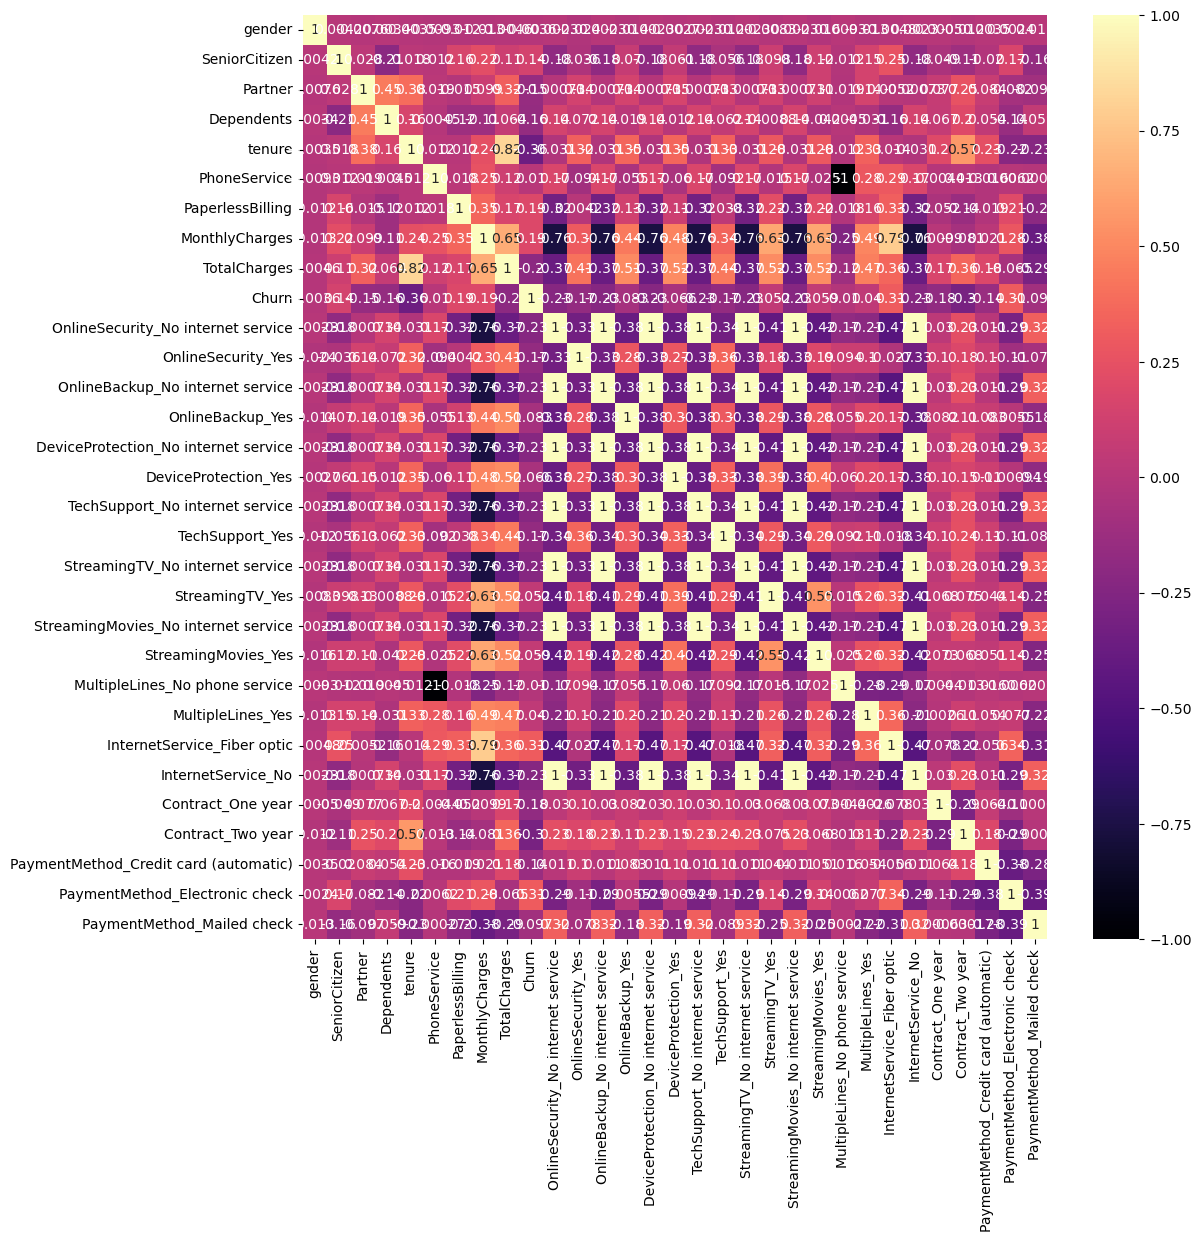

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),cmap='magma',annot=True)

In [48]:
train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.004215,-0.007642,0.003432,-0.003528,-0.009340,-0.011625,-0.013224,-0.004643,-0.003648,...,-0.015723,0.009340,-0.013180,-0.004753,0.002340,0.000496,-0.012476,0.003533,0.002363,0.012834
SeniorCitizen,0.004215,1.000000,0.028488,-0.209913,0.018411,0.011670,0.161566,0.218953,0.105547,0.142127,...,0.115136,-0.011670,0.146819,0.254367,-0.181323,-0.048810,-0.112385,-0.020046,0.170704,-0.156541
Partner,-0.007642,0.028488,1.000000,0.447877,0.383389,0.019256,-0.015039,0.098975,0.321329,-0.148593,...,0.113830,-0.019256,0.140829,0.005180,-0.000735,0.077309,0.251464,0.084281,-0.082335,-0.097123
Dependents,0.003432,-0.209913,0.447877,1.000000,0.159524,-0.004493,-0.115148,-0.114065,0.064006,-0.162260,...,-0.041551,0.004493,-0.031434,-0.161870,0.140956,0.067169,0.197669,0.054135,-0.142349,0.058877
tenure,-0.003528,0.018411,0.383389,0.159524,1.000000,0.011864,0.012281,0.241960,0.823518,-0.357361,...,0.283401,-0.011864,0.329504,0.014000,-0.030506,0.201266,0.566114,0.234696,-0.219994,-0.227020
PhoneService,-0.009340,0.011670,0.019256,-0.004493,0.011864,1.000000,0.017958,0.252488,0.117005,0.010061,...,-0.024863,-1.000000,0.281433,0.291992,0.172509,-0.004371,0.013069,-0.015966,0.006154,-0.000271
PaperlessBilling,-0.011625,0.161566,-0.015039,-0.115148,0.012281,0.017958,1.000000,0.353757,0.165052,0.193608,...,0.217330,-0.017958,0.163272,0.325703,-0.321876,-0.052352,-0.139712,-0.018823,0.206484,-0.202729
MonthlyCharges,-0.013224,0.218953,0.098975,-0.114065,0.241960,0.252488,0.353757,1.000000,0.650470,0.189326,...,0.631364,-0.252488,0.490761,0.785570,-0.761587,0.009882,-0.080979,0.020855,0.275796,-0.375790
TotalCharges,-0.004643,0.105547,0.321329,0.064006,0.823518,0.117005,0.165052,0.650470,1.000000,-0.202582,...,0.521879,-0.117005,0.467471,0.358610,-0.372536,0.171400,0.355087,0.180196,-0.064624,-0.289905
Churn,-0.003648,0.142127,-0.148593,-0.162260,-0.357361,0.010061,0.193608,0.189326,-0.202582,1.000000,...,0.058659,-0.010061,0.040005,0.307174,-0.226933,-0.178517,-0.304058,-0.138829,0.310532,-0.096949


In [113]:
def checking_things_with_smiliar(df,threshold):
    result = {}
    temp = df.corr()
    store = df.columns.tolist()
    for s1 in store:
        for s2 in store:
            if s1==s2:
                break
            elif np.abs(temp.at[s1, s2])>=threshold:
                result.setdefault(s1, []).append([s2,temp.at[s1,s2]])
    return result

In [66]:
temp = (checking_things_with_smiliar(train.drop('Churn',axis=1),0.8))
for key,value in temp.items():
    print(f"{key} : {value}")
    print("\n")

TotalCharges : [['tenure', 0.8235175119233891]]


OnlineBackup_No internet service : [['OnlineSecurity_No internet service', 1.0]]


DeviceProtection_No internet service : [['OnlineSecurity_No internet service', 1.0], ['OnlineBackup_No internet service', 1.0]]


TechSupport_No internet service : [['OnlineSecurity_No internet service', 1.0], ['OnlineBackup_No internet service', 1.0], ['DeviceProtection_No internet service', 1.0]]


StreamingTV_No internet service : [['OnlineSecurity_No internet service', 1.0], ['OnlineBackup_No internet service', 1.0], ['DeviceProtection_No internet service', 1.0], ['TechSupport_No internet service', 1.0]]


StreamingMovies_No internet service : [['OnlineSecurity_No internet service', 1.0], ['OnlineBackup_No internet service', 1.0], ['DeviceProtection_No internet service', 1.0], ['TechSupport_No internet service', 1.0], ['StreamingTV_No internet service', 1.0]]


InternetService_No : [['OnlineSecurity_No internet service', 1.0], ['OnlineBackup_No intern

In [74]:
store = [value[0] for value in temp['InternetService_No']]

In [80]:
train.corr().loc['Churn'][store]

OnlineSecurity_No internet service     -0.226933
OnlineBackup_No internet service       -0.226933
DeviceProtection_No internet service   -0.226933
TechSupport_No internet service        -0.226933
StreamingTV_No internet service        -0.226933
StreamingMovies_No internet service    -0.226933
Name: Churn, dtype: float64

In [86]:
train.drop(store,axis=1,inplace=True)
test.drop(store,axis=1,inplace=True)

In [88]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,67,1,1,111.20,7530.80,0,...,1,0,1,1,0,0,1,0,0,0
1,0,0,0,0,2,1,0,19.90,57.40,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,3,1,1,74.75,229.50,1,...,0,0,1,1,0,0,0,1,0,0
3,0,0,0,0,66,1,1,103.10,6595.00,0,...,1,0,1,1,0,0,0,0,0,0
4,0,0,1,1,69,1,1,108.75,7493.05,0,...,1,0,1,1,0,1,0,0,0,0


In [116]:
checking_things_with_smiliar(train,.6)

{'TotalCharges': [['tenure', 0.8235175119233891],
  ['MonthlyCharges', 0.6504696925579173]],
 'StreamingTV_Yes': [['MonthlyCharges', 0.6310663423570366]],
 'StreamingMovies_Yes': [['MonthlyCharges', 0.6313641129626965]],
 'MultipleLines_No phone service': [['PhoneService', -0.9999999999999998]],
 'InternetService_Fiber optic': [['MonthlyCharges', 0.7855700669103833]],
 'InternetService_No': [['MonthlyCharges', -0.7615872812515456]]}

In [121]:
train.corr().Churn.sort_values()

tenure                                  -0.357361
Contract_Two year                       -0.304058
InternetService_No                      -0.226933
TotalCharges                            -0.202582
Contract_One year                       -0.178517
OnlineSecurity_Yes                      -0.170797
TechSupport_Yes                         -0.170120
Dependents                              -0.162260
Partner                                 -0.148593
PaymentMethod_Credit card (automatic)   -0.138829
PaymentMethod_Mailed check              -0.096949
OnlineBackup_Yes                        -0.083356
DeviceProtection_Yes                    -0.066422
MultipleLines_No phone service          -0.010061
gender                                  -0.003648
PhoneService                             0.010061
MultipleLines_Yes                        0.040005
StreamingTV_Yes                          0.051831
StreamingMovies_Yes                      0.058659
SeniorCitizen                            0.142127


In [123]:
train.drop('MonthlyCharges',axis=1,inplace=True)
test.drop('MonthlyCharges',axis=1,inplace=True)

In [134]:
train.drop(['TotalCharges','MultipleLines_No phone service'],axis=1,inplace=True)

In [139]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,...,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,67,1,1,0,0,1,...,1,1,1,1,0,0,1,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,3,1,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,0,0,0,66,1,1,0,1,1,...,0,1,1,1,0,0,0,0,0,0
4,0,0,1,1,69,1,1,0,0,1,...,1,1,1,1,0,1,0,0,0,0


In [147]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(train.drop('Churn',axis=1),train['Churn'])
mi_df = pd.DataFrame({'Feature': train.drop('Churn',axis=1).columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

In [157]:
train.drop(mi_df[mi_df['MI Score']<0.001].Feature.tolist(),axis=1,inplace=True)
test.drop(mi_df[mi_df['MI Score']<0.001].Feature.tolist(),axis=1,inplace=True)

In [166]:
train.head()

,Partner,Dependents,tenure,PaperlessBilling,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,67,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,3,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0
3,0,0,66,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0
4,1,1,69,1,0,0,1,1,1,1,1,1,0,1,0,0,0,0


<Axes: xlabel='tenure', ylabel='Count'>

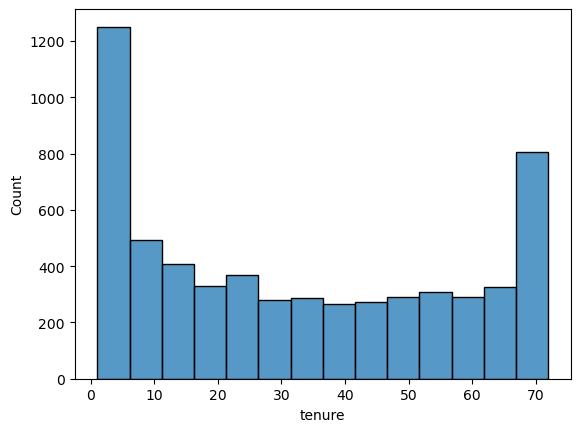

In [168]:
sns.histplot(train.tenure)

<Axes: xlabel='Churn', ylabel='Count'>

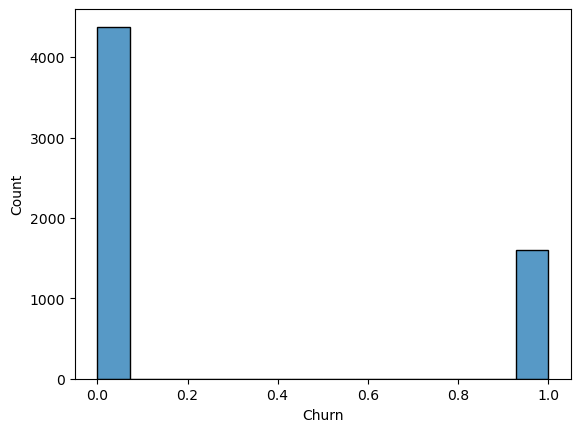

In [172]:
sns.histplot(train['Churn'])

In [3]:
train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')

In [176]:
train.shape

(5976, 18)

In [15]:
train.head()

,Partner,Dependents,tenure,PaperlessBilling,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,67,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,3,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0
3,0,0,66,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0
4,1,1,69,1,0,0,1,1,1,1,1,1,0,1,0,0,0,0


In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
X = train.drop('Churn',axis=1)
y = train['Churn']

In [9]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] 
}
model = LogisticRegression()

In [13]:
gridsearch = GridSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [15]:
gridsearch.fit(X,y)

C:\Users\DILJITH\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [17]:
best_log_model = gridsearch.best_estimator_

In [31]:
import joblib
best_log_model = joblib.load('best_log_model.pkl')
import warnings
warnings.filterwarnings('ignore')

In [33]:
scores = {}
from sklearn.model_selection import cross_val_score
score = cross_val_score(best_log_model,X,y,cv=5,scoring='accuracy')
scores['logistic'] = np.mean(score)

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import joblib
joblib.dump(best_log_model, "best_log_model.pkl")

['best_log_model.pkl']

In [17]:
rf = RandomForestClassifier(random_state=68)
param_grid = {
    'n_estimators': [50, 100,200], 
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [False] 
}
gridsearch = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

In [19]:
gridsearch.fit(X,y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=68), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [21]:
best_rf_model = gridsearch.best_estimator_

In [35]:
score = cross_val_score(best_rf_model,X,y,cv=5,scoring='accuracy')
scores['Random Forest'] = np.mean(score)

In [37]:
scores

{'logistic': 0.8028765340535398, 'Random Forest': 0.7985263290466128}

In [11]:
param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3]
}
svc = SVC()

In [41]:
joblib.dump(best_rf_model,'best_rf_model.pkl')

['best_rf_model.pkl']

In [19]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(svc,param_distributions=param_distributions,n_iter=10,cv=5,scoring='accuracy',n_jobs=-2,random_state=68)

In [ ]:
randomsearch.fit(X,y)

In [3]:
train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')

In [11]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

In [13]:
gnb = GaussianNB()
grid_search = GridSearchCV(gnb,param_grid,cv=5,scoring='accuracy')

In [15]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]},
             scoring='accuracy')

In [19]:
from sklearn.model_selection import cross_val_score
best_gnb_model = grid_search.best_estimator_
cv = cross_val_score(best_gnb_model,X,y,cv=5,scoring='accuracy')

In [23]:
np.mean(cv)

0.7756002574831026

In [25]:
import joblib
joblib.dump(best_gnb_model,'best_gnb_model.pkl')

['best_gnb_model.pkl']

In [27]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [33]:
grid_search = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')

In [35]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
best_knn_model = grid_search.best_estimator_
cv = cross_val_score(best_knn_model,X,y,cv=5,scoring='accuracy')

In [39]:
np.mean(cv)

0.7796186731224024

In [41]:
joblib.dump(best_knn_model,'best_knn_model.pkl')

['best_knn_model.pkl']

In [43]:
best_log_model = joblib.load('best_log_model.pkl')
best_rf_model = joblib.load('best_rf_model.pkl')

In [45]:
test.head()

,customerID,Partner,Dependents,tenure,PaperlessBilling,TotalCharges,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,...,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,3627-FHKBK,0,0,1,0,75.30,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,9680-NIAUV,1,1,72,0,8129.30,0,1,1,0,...,1,0,1,1,0,0,1,1,0,0
2,5732-IKGQH,1,0,52,1,5481.25,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3549-ZTMNH,1,1,12,1,269.65,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2672-OJQZP,0,0,1,0,44.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
store = test['customerID']

In [49]:
test.drop('customerID',axis=1,inplace=True)

In [63]:
X_test = test.drop('Churn',axis=1)
y_test = test['Churn']

In [65]:
X_test.head()

,Partner,Dependents,tenure,PaperlessBilling,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,1,72,0,1,1,0,1,1,1,1,0,0,1,1,0,0
2,1,0,52,1,1,0,1,1,1,0,1,0,1,0,0,0,0
3,1,1,12,1,0,0,0,0,0,1,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
train.head()

,Partner,Dependents,tenure,PaperlessBilling,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,67,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,3,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0
3,0,0,66,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0
4,1,1,69,1,0,0,1,1,1,1,1,1,0,1,0,0,0,0


In [59]:
test = test[train.columns.tolist()]

In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [71]:
temp = [best_log_model,best_rf_model,best_gnb_model,best_knn_model]
import time
for t in temp:
    prediction = t.predict(X_test)
    print(accuracy_score(y_test,prediction))
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))

0.8001893939393939
[[705  80]
 [131 140]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       785
           1       0.64      0.52      0.57       271

    accuracy                           0.80      1056
   macro avg       0.74      0.71      0.72      1056
weighted avg       0.79      0.80      0.79      1056

0.8039772727272727
[[706  79]
 [128 143]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       785
           1       0.64      0.53      0.58       271

    accuracy                           0.80      1056
   macro avg       0.75      0.71      0.73      1056
weighted avg       0.79      0.80      0.80      1056

0.7736742424242424
[[628 157]
 [ 82 189]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       785
           1       0.55      0.70      0.61       271

    accuracy                           0.77      1056
  